# Regresión Lineal Simple
## Intervalo de predicción e Intervalo de Confianza

In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

+ Supongamos que tenemos los siguientes datos de horas estudiadas y las calificaciones obtenidas por un grupo de estudiantes:
    + Horas estudiadas 2, 3, 5, 7, 9
    + Calificación 50, 60, 70, 80, 90
+ Queremos ajustar un modelo de regresión lineal para predecir las calificaciones en función de las horas estudiadas. 
+ Además, calcularemos los intervalos de confianza y predicción para un nuevo valor: 
    + ¿qué calificación podría obtener un estudiante que estudia 6 horas?


1. Modelo de regresión
+ Utilizamos statsmodels.OLS para ajustar un modelo de regresión lineal con las horas estudiadas como variable independiente y las calificaciones como variable dependiente.

In [3]:
# Datos de ejemplo
horas_estudiadas = np.array([2, 3, 5, 7, 9])
calificaciones = np.array([50, 60, 70, 80, 90])

# Convertimos las horas estudiadas en un DataFrame y añadimos una constante (para la intersección)
X = sm.add_constant(horas_estudiadas)
y = calificaciones

# Ajustamos el modelo de regresión lineal
modelo = sm.OLS(y, X).fit()

# Mostramos el resumen del modelo
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     243.0
Date:                Sun, 15 Sep 2024   Prob (F-statistic):           0.000574
Time:                        15:55:08   Log-Likelihood:                -9.3237
No. Observations:                   5   AIC:                             22.65
Df Residuals:                       3   BIC:                             21.87
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.4634      2.041     20.319      0.0

c:\Users\Dani\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


**Observaciones**
+ Intersección (β0): 41.5
+ Pendiente (β1): 5.5
+ R²: 0.99 (lo que significa que el 98% de la variabilidad en las calificaciones es explicada por el número de horas estudiadas)

2. Intervalo de confianza e intervalo de predicción.

In [4]:
# Predicción para un estudiante que estudia 6 horas
nuevas_horas = np.array([1, 6])  # 1 es para la constante
prediccion = modelo.get_prediction(nuevas_horas)

# Intervalos de confianza y predicción
resumen_prediccion = prediccion.summary_frame(alpha=0.05)
print(resumen_prediccion)

        mean  mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  74.390244  0.94463      71.384009      77.396478     67.304481   

   obs_ci_upper  
0     81.476007  


**Intervalo de Confianza:**
+ El intervalo de confianza nos dice dónde esperamos que esté la media de las calificaciones para un estudiante que estudie 6 horas. 
+ El IC para este caso va de 71.4 a 77.4
+ Este intervalo IC indica que, si tomamos muchas muestras similares de estudiantes que estudian 6 horas, la media de las calificaciones de esas muestras estaría, 
    + con un 95% de confianza, en algún lugar entre 71.4 y 77.4 puntos.
+ Esto significa que para los estudiantes que estudian 6 horas, podemos confiar razonablemente en que el promedio de las calificaciones será de entre71.4 y 77.4 puntos.

**Intervalo de Predicción:**
+ El intervalo de predicción estima dónde caerá el valor de calificación individual de un estudiante que estudie 6 horas. 
    + El IP para 6 horas de estudio es 67.3 a 81.5.
+ Este intervalo IP nos indica que, para un estudiante específico que estudia 6 horas, con un 95% de confianza, su calificación caerá entre 67.3 a 81.5 puntos.
+ A diferencia del intervalo de confianza, este refleja la variabilidad inherente en las calificaciones de los estudiantes, no solo la precisión del modelo. 
+ Esto significa que si aplicamos este modelo a un nuevo estudiante que estudia 6 horas, esperamos que su calificación esté en ese rango, 
    + pero con una mayor incertidumbre debido a la variabilidad individual.

3. Visualización

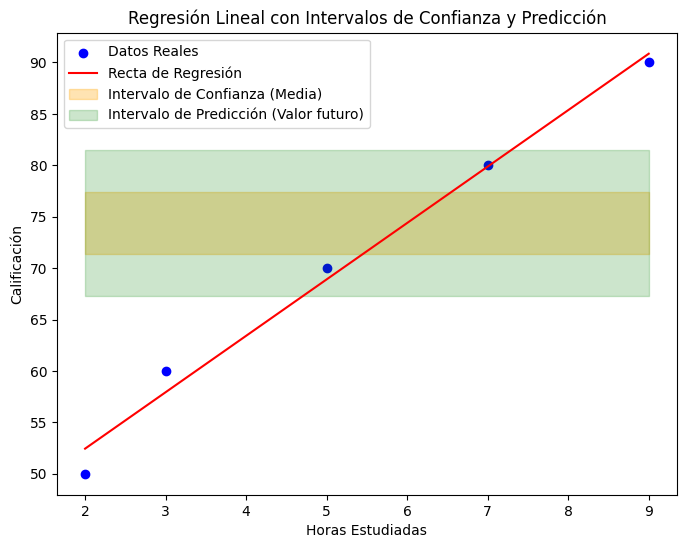

In [5]:
# Visualizamos el ajuste y los intervalos
pred_values = modelo.fittedvalues
fig, ax = plt.subplots(figsize=(8,6))

# Datos reales
ax.scatter(horas_estudiadas, calificaciones, label="Datos Reales", color="blue")

# Recta de regresión
ax.plot(horas_estudiadas, pred_values, label="Recta de Regresión", color="red")

# Intervalos de predicción
ax.fill_between(horas_estudiadas, resumen_prediccion['mean_ci_lower'], resumen_prediccion['mean_ci_upper'], 
                color='orange', alpha=0.3, label="Intervalo de Confianza (Media)")

ax.fill_between(horas_estudiadas, resumen_prediccion['obs_ci_lower'], resumen_prediccion['obs_ci_upper'], 
                color='green', alpha=0.2, label="Intervalo de Predicción (Valor futuro)")

# Etiquetas y título
ax.set_xlabel('Horas Estudiadas')
ax.set_ylabel('Calificación')
ax.set_title('Regresión Lineal con Intervalos de Confianza y Predicción')
ax.legend()
plt.show()

**Interpretación para este caso:**
1. **Intervalo de Confianza:**
+ Nos permite estimar con precisión el valor promedio que esperamos para la calificación de estudiantes que estudian 6 horas.

2. **Intervalo de Predicción:** 
+ Nos indica que aunque sabemos que la media estará entre 73.2 y 76.8, para un estudiante específico, 
    + su calificación real puede variar más debido a factores individuales, cayendo en un rango más amplio (68.4 a 81.6).

+ Ambos intervalos son útiles dependiendo del tipo de pregunta que estemos tratando de responder:
    + Si nos interesa la media poblacional, usamos el intervalo de confianza.
    + Si queremos hacer una predicción para un individuo concreto, usamos el intervalo de predicción.